## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [809]:
import os
import json

import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [810]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_data.npy

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [811]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [812]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [813]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [814]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

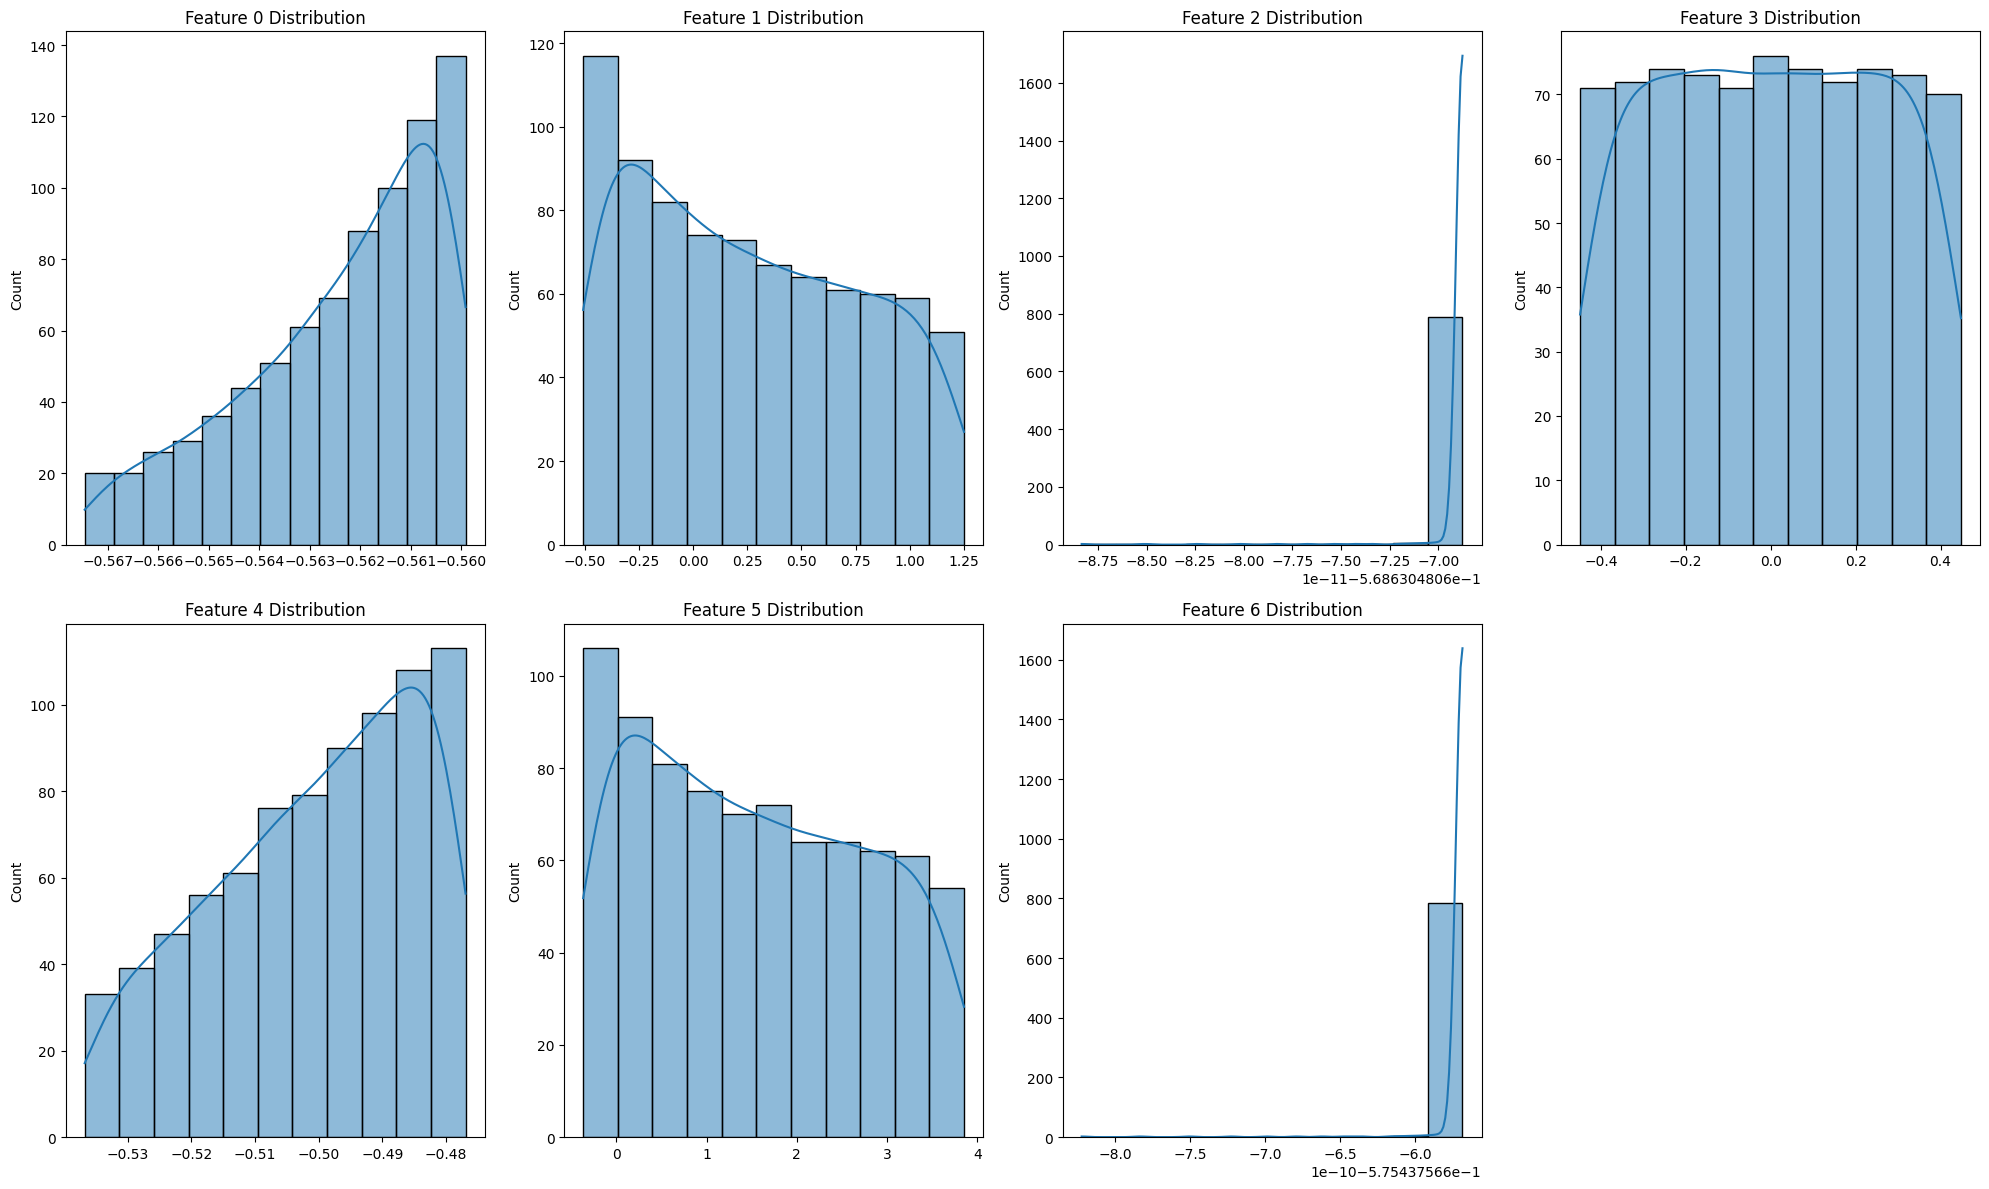

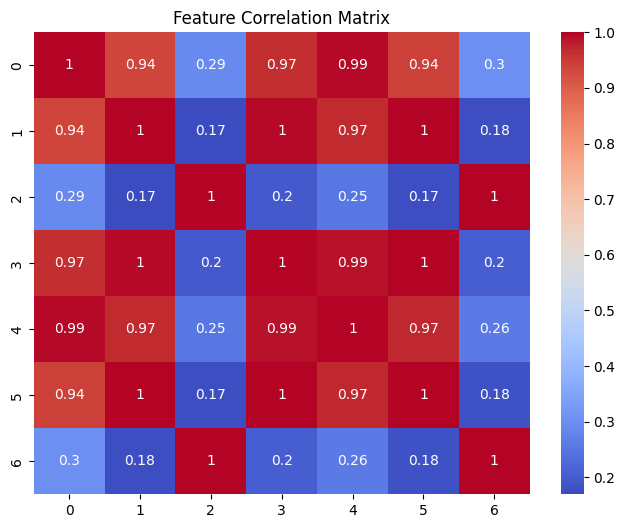

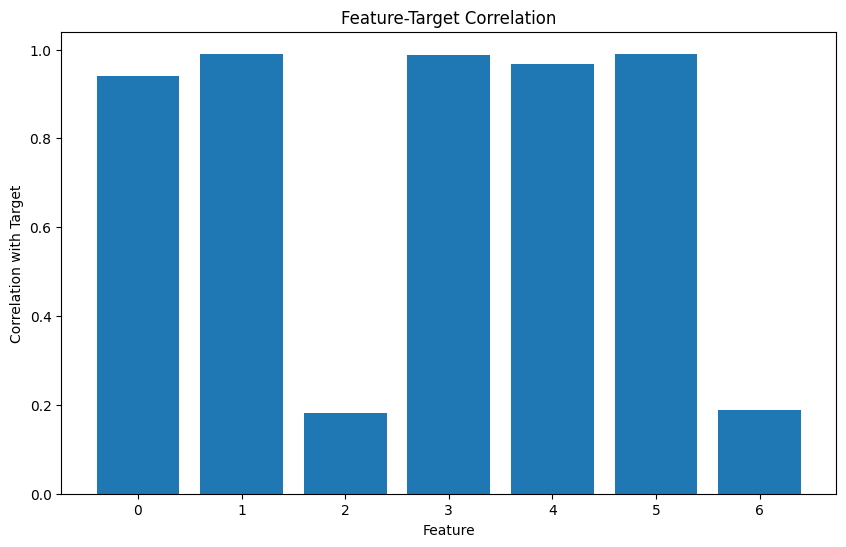

In [815]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distributions of each feature
plt.figure(figsize=(20, 12))

for i in range(data.shape[1]):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[:, i], kde=True)
    plt.title(f'Feature {i} Distribution')

plt.tight_layout()
plt.show()

# Analyzing correlations
correlation_matrix = np.corrcoef(data, rowvar=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Analyzing correlation with target
feature_target_corr = [np.corrcoef(data[:, i], target)[0, 1] for i in range(data.shape[1])]
plt.figure(figsize=(10, 6))
plt.bar(range(data.shape[1]), feature_target_corr)
plt.xlabel('Feature')
plt.ylabel('Correlation with Target')
plt.title('Feature-Target Correlation')
plt.xticks(range(data.shape[1]))
plt.show()

In [816]:
# optional transformations
# Функция преобразования признаков
def my_transformation(feature_matrix: np.ndarray):
    # Инициализация новой матрицы признаков с дополнительными столбцами для новых признаков
    new_features_count = 7  # Количество дополнительных признаков
    # Исключаем третий признак (индекс 2), добавляем новые преобразованные признаки
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1] + new_features_count - 1))

    # Копирование исходных признаков, исключая третий
    new_feature_matrix[:, :2] = feature_matrix[:, :2]
    new_feature_matrix[:, 2:6] = feature_matrix[:, 3:7]

    # Добавление новых преобразованных признаков
    new_feature_matrix[:, 6] = np.log1p(np.abs(feature_matrix[:, 1]))  # Логарифм первого признака
    new_feature_matrix[:, 7] = np.sqrt(np.abs(feature_matrix[:, 1]))  # Корень второго признака
    new_feature_matrix[:, 8] = np.exp(feature_matrix[:, 1])  # Экспонента четвертого признака
    new_feature_matrix[:, 9] = feature_matrix[:, 4] * feature_matrix[:, 5]  # Произведение пятого и шестого признаков
    new_feature_matrix[:, 10] = feature_matrix[:, 0] / (1 + np.abs(feature_matrix[:, 1]))  # Отношение первого и второго признаков
    new_feature_matrix[:, 11] = np.tanh(feature_matrix[:, 6])  # Гиперболический тангенс седьмого признака
    # Добавим еще одно преобразование
    new_feature_matrix[:, 12] = feature_matrix[:, 4] ** 2  # Квадрат пятого признака

    return new_feature_matrix
# Преобразование данных
closed_data = my_transformation(closed_data)

In [817]:
transformed_train_x = my_transformation(train_x)

In [818]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Создание объекта Ridge регрессии
ridge = Ridge()

# Задание диапазона значений alpha
alphas = np.linspace(0, 2, 1000)  # пример: от 0.001 до 1000

# Создание объекта GridSearchCV
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Подгонка модели к данным
grid_search.fit(transformed_train_x, train_y)

# Получение наилучшего значения alpha
best_alpha = grid_search.best_params_['alpha']

# Вывод результатов
print(f'Best alpha: {best_alpha}')

# Предсказания на валидационной выборке
predictions = grid_search.predict(my_transformation(valid_x))

# Измерение MSE
mse = mean_squared_error(predictions, valid_y)
print(f'MSE on validation set: {mse:.5f}')

c:\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.9497e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.37158e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best alpha: 0.47847847847847846
MSE on validation set: 0.08591


In [819]:
lr = Ridge(alpha=best_alpha)
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09156
validation mse = 0.08591


In [820]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [821]:
predicted_values = np.round(get_predictions(model=lr, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [822]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
    
print('File saved to `submission_dict_final_p01.npy`')
# __________end of block__________

File saved to `submission_dict_final_p01.npy`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

In [823]:
def my_transformation(feature_matrix: np.ndarray):
    # Инициализация новой матрицы признаков с дополнительными столбцами для новых признаков
    new_features_count = 7  # Количество дополнительных признаков
    # Исключаем третий признак (индекс 2), добавляем новые преобразованные признаки
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1] + new_features_count - 1))

    # Копирование исходных признаков, исключая третий
    new_feature_matrix[:, :2] = feature_matrix[:, :2]
    new_feature_matrix[:, 2:6] = feature_matrix[:, 3:7]

    # Добавление новых преобразованных признаков
    new_feature_matrix[:, 6] = np.log1p(np.abs(feature_matrix[:, 0]))  # Логарифм первого признака
    new_feature_matrix[:, 7] = np.sqrt(np.abs(feature_matrix[:, 1]))  # Корень второго признака
    new_feature_matrix[:, 8] = np.exp(feature_matrix[:, 3])  # Экспонента четвертого признака
    new_feature_matrix[:, 9] = feature_matrix[:, 4] * feature_matrix[:, 5]  # Произведение пятого и шестого признаков
    new_feature_matrix[:, 10] = feature_matrix[:, 0] / (1 + np.abs(feature_matrix[:, 1]))  # Отношение первого и второго признаков
    new_feature_matrix[:, 11] = np.tanh(feature_matrix[:, 6])  # Гиперболический тангенс седьмого признака
    # Добавим еще одно преобразование
    new_feature_matrix[:, 12] = feature_matrix[:, 4] ** 2  # Квадрат пятого признака

    return new_feature_matrix

In [824]:
transformed_train_x = my_transformation(train_x)

In [825]:
lr = Ridge(alpha=best_alpha)
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09166
validation mse = 0.08602


In [826]:
def calculate_score(mse):
    """
    Функция для расчета оценки на основе среднеквадратичной ошибки (MSE).

    :param mse: Среднеквадратичная ошибка (MSE)
    :return: Оценка, рассчитанная по формуле
    """
    score = max((0.5 - mse) * 3, 0)
    return score

# Пример использования функции
mse_example = mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y)
score = calculate_score(mse_example)
score

1.2419265365607217

Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [827]:
original_predictions = lr.predict(transformed_train_x)
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [828]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [0.003, 0.4467, 0.3362, 0.0261, 1.1806, -0.0, -0.0019, -0.0521, 0.1473, -0.6383, -0.0824, -0.0, -0.0266]
b = 1.2023


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [829]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [830]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0
    ] * feature_matrix[:, 1]
    return new_feature_matrix

w_submission = [-0.0027, -0.2637, 0.0, -0.1134, -0.0165, -0.9329, 0.0, 0.1293]
b_submission = 1.1312
# __________example_submission_end__________

На этом задание завершено. Поздравляем!